# 1. Import ไลบรารี

In [ ]:
import pandas as pd # pandas และ numpy ใช้สำหรับการจัดการข้อมูล
import requests # requests (แม้จะไม่ได้ใช้) มักใช้ในการดึงข้อมูลจาก API
import numpy as np
import matplotlib.pyplot as plt # matplotlib และ seaborn ใช้สำหรับการวิเคราะห์และแสดงผลข้อมูล
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
co2gdp = pd.read_csv("co2gdp.csv")
co2capi = pd.read_csv("co2capica.csv")
co2sec = pd.read_csv("co_sector.csv")
co2em = pd.read_csv("co2_emission_data.csv")
# โหลดชุดข้อมูล 4 ไฟล์ที่เกี่ยวข้องกับ CO₂ และเศรษฐกิจ

# co2gdp

In [ ]:
co2gdp

,Substance,EDGAR Country Code,Country,1990,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CO2,ABW,Aruba,0.092481,0.096488,0.100926,0.094355,0.099075,0.106283,0.069056,...,0.113643,0.119893,0.123698,0.111193,0.108441,0.132925,0.141838,0.122931,0.111749,0.111895
1,CO2,AFG,Afghanistan,0.054780,0.059919,0.037695,0.049266,0.059836,0.034647,0.035429,...,0.079075,0.083131,0.073317,0.076537,0.074379,0.065416,0.065190,0.092468,0.102715,0.113263
2,CO2,AGO,Angola,0.130682,0.135733,0.148292,0.195442,0.182514,0.178915,0.190727,...,0.110940,0.117768,0.114269,0.102207,0.097331,0.102926,0.081930,0.098752,0.103763,0.106180
3,CO2,AIA,Anguilla,0.022438,0.036164,0.028516,0.034614,0.044457,0.055347,0.056755,...,0.087859,0.101893,0.114061,0.134901,0.170473,0.110982,0.097852,0.089473,0.078348,0.072665
4,CO2,ALB,Albania,0.375956,0.344149,0.200072,0.171770,0.167263,0.130339,0.118600,...,0.136632,0.127572,0.115018,0.130647,0.124754,0.114094,0.108635,0.110215,0.096135,0.092592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,CO2,ZWE,Zimbabwe,0.410847,0.428274,0.471949,0.429844,0.368482,0.361621,0.316619,...,0.253341,0.250125,0.220088,0.198681,0.219313,0.213132,0.187797,0.202738,0.196411,0.200469
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,CO2,EU27,EU27,0.268264,0.262660,0.251158,0.248105,0.240982,0.237794,0.239653,...,0.146183,0.145655,0.143163,0.140068,0.133930,0.125278,0.120631,0.122048,0.114632,0.103903
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **ลบค่าที่ขาดหาย (NaN)**

In [ ]:
co2gdp.dropna(inplace=True)  # ลบแถวที่มีค่า NaN
co2gdp.dropna(axis=1, inplace=True)  # ลบคอลัมน์ที่มีค่า NaN **โดยลบแถวและคอลัมน์ที่มีค่า NaN เพื่อทำให้ข้อมูลสะอาดขึ้น
co2gdp

,Substance,EDGAR Country Code,Country,1990,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CO2,ABW,Aruba,0.092481,0.096488,0.100926,0.094355,0.099075,0.106283,0.069056,...,0.113643,0.119893,0.123698,0.111193,0.108441,0.132925,0.141838,0.122931,0.111749,0.111895
1,CO2,AFG,Afghanistan,0.054780,0.059919,0.037695,0.049266,0.059836,0.034647,0.035429,...,0.079075,0.083131,0.073317,0.076537,0.074379,0.065416,0.065190,0.092468,0.102715,0.113263
2,CO2,AGO,Angola,0.130682,0.135733,0.148292,0.195442,0.182514,0.178915,0.190727,...,0.110940,0.117768,0.114269,0.102207,0.097331,0.102926,0.081930,0.098752,0.103763,0.106180
3,CO2,AIA,Anguilla,0.022438,0.036164,0.028516,0.034614,0.044457,0.055347,0.056755,...,0.087859,0.101893,0.114061,0.134901,0.170473,0.110982,0.097852,0.089473,0.078348,0.072665
4,CO2,ALB,Albania,0.375956,0.344149,0.200072,0.171770,0.167263,0.130339,0.118600,...,0.136632,0.127572,0.115018,0.130647,0.124754,0.114094,0.108635,0.110215,0.096135,0.092592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,CO2,ZAF,South Africa,0.713604,0.702361,0.702496,0.698920,0.692452,0.707820,0.701947,...,0.594817,0.557954,0.554806,0.559550,0.555532,0.559810,0.520908,0.509104,0.477265,0.460465
206,CO2,ZMB,Zambia,0.160359,0.166112,0.169124,0.143595,0.131837,0.126518,0.100218,...,0.087900,0.090695,0.095349,0.112324,0.122904,0.105675,0.115672,0.113068,0.108015,0.105356
207,CO2,ZWE,Zimbabwe,0.410847,0.428274,0.471949,0.429844,0.368482,0.361621,0.316619,...,0.253341,0.250125,0.220088,0.198681,0.219313,0.213132,0.187797,0.202738,0.196411,0.200469
209,CO2,EU27,EU27,0.268264,0.262660,0.251158,0.248105,0.240982,0.237794,0.239653,...,0.146183,0.145655,0.143163,0.140068,0.133930,0.125278,0.120631,0.122048,0.114632,0.103903


# เลือกข้อมูลเฉพาะของประเทศไทย ในเเต่ละชุดข้อมูล

In [ ]:
filtered_co2gdp = co2gdp[ ( co2gdp["Country"] == "Thailand")] # กรองเฉพาะแถวที่เป็นประเทศไทยสำหรับแต่ละชุดข้อมูล
filtered_co2gdp

,Substance,EDGAR Country Code,Country,1990,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
183,CO2,THA,Thailand,0.200214,0.201101,0.203989,0.213924,0.220995,0.231476,0.246352,...,0.211657,0.21081,0.201091,0.193679,0.184252,0.186912,0.191953,0.184205,0.185408,0.180855


# co2capi

In [ ]:
co2capi

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CO2,ABW,Aruba,0.426897,0.484989,0.659627,0.735180,0.718166,0.946243,0.931286,...,4.245765,4.428035,4.625829,4.432585,4.408831,5.260740,4.251800,4.678834,4.698068,4.907649
1,CO2,AFG,Afghanistan,0.155843,0.151843,0.144480,0.144158,0.177764,0.161153,0.147399,...,0.238896,0.247403,0.217209,0.227023,0.218073,0.194820,0.185367,0.203803,0.207640,0.214208
2,CO2,AGO,Angola,1.318388,1.229851,1.461079,1.559090,1.579612,1.419418,0.922919,...,1.147351,1.188023,1.085804,0.938152,0.853276,0.867421,0.630903,0.745348,0.781783,0.781798
3,CO2,AIA,Anguilla,0.340089,0.337574,0.349668,0.323136,0.357768,0.391259,0.366989,...,1.930773,1.918187,1.921063,1.950944,1.877520,1.819192,1.492093,1.467855,1.457423,1.434722
4,CO2,ALB,Albania,2.252854,2.197122,2.448395,2.147417,2.259787,2.249523,2.352181,...,1.744683,1.663682,1.548099,1.822925,1.808087,1.685780,1.550212,1.711730,1.563967,1.558136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,CO2,ZWE,Zimbabwe,1.841234,1.770972,1.642188,1.842407,1.756594,1.499125,1.592790,...,0.817413,0.804278,0.697585,0.640381,0.725469,0.645709,0.513116,0.588222,0.594587,0.624219
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,CO2,EU27,EU27,9.116194,9.084094,9.398124,9.827468,9.615450,9.331465,9.929618,...,6.848144,6.980888,6.995353,7.043758,6.881852,6.558435,5.953840,6.386992,6.214273,5.663895
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
co2capi.dropna(inplace=True)  # ลบแถวที่มีค่า NaN
co2capi.dropna(axis=1, inplace=True)  # ลบคอลัมน์ที่มีค่า NaN
co2capi

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CO2,ABW,Aruba,0.426897,0.484989,0.659627,0.735180,0.718166,0.946243,0.931286,...,4.245765,4.428035,4.625829,4.432585,4.408831,5.260740,4.251800,4.678834,4.698068,4.907649
1,CO2,AFG,Afghanistan,0.155843,0.151843,0.144480,0.144158,0.177764,0.161153,0.147399,...,0.238896,0.247403,0.217209,0.227023,0.218073,0.194820,0.185367,0.203803,0.207640,0.214208
2,CO2,AGO,Angola,1.318388,1.229851,1.461079,1.559090,1.579612,1.419418,0.922919,...,1.147351,1.188023,1.085804,0.938152,0.853276,0.867421,0.630903,0.745348,0.781783,0.781798
3,CO2,AIA,Anguilla,0.340089,0.337574,0.349668,0.323136,0.357768,0.391259,0.366989,...,1.930773,1.918187,1.921063,1.950944,1.877520,1.819192,1.492093,1.467855,1.457423,1.434722
4,CO2,ALB,Albania,2.252854,2.197122,2.448395,2.147417,2.259787,2.249523,2.352181,...,1.744683,1.663682,1.548099,1.822925,1.808087,1.685780,1.550212,1.711730,1.563967,1.558136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,CO2,ZAF,South Africa,8.125071,7.855500,7.913916,8.387916,8.425331,8.810054,9.119382,...,8.875170,8.320518,8.220871,8.283404,8.252836,8.242273,7.131548,7.218495,6.823912,6.556119
206,CO2,ZMB,Zambia,0.886444,0.893251,0.954215,0.986912,0.962235,0.962664,0.930602,...,0.320706,0.330434,0.349770,0.414017,0.457481,0.387423,0.400302,0.403673,0.394233,0.395319
207,CO2,ZWE,Zimbabwe,1.841234,1.770972,1.642188,1.842407,1.756594,1.499125,1.592790,...,0.817413,0.804278,0.697585,0.640381,0.725469,0.645709,0.513116,0.588222,0.594587,0.624219
209,CO2,EU27,EU27,9.116194,9.084094,9.398124,9.827468,9.615450,9.331465,9.929618,...,6.848144,6.980888,6.995353,7.043758,6.881852,6.558435,5.953840,6.386992,6.214273,5.663895


In [ ]:
filtered_co2capi = co2capi[ ( co2capi["Country"] == "Thailand")]
filtered_co2capi

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
183,CO2,THA,Thailand,0.490919,0.478994,0.528187,0.57901,0.563152,0.563154,0.628206,...,3.980406,4.074387,4.008044,4.011437,3.968968,4.104102,3.953834,3.848906,3.965514,3.937893


# co2sec

In [ ]:
co2sec

,Substance,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CO2,Agriculture,AFG,Afghanistan,0.029229,0.029229,0.029229,0.029229,0.039967,0.045310,...,0.084490,0.116967,0.163009,0.311300,0.161333,0.151276,0.064795,0.046692,0.023617,0.015142
1,CO2,Agriculture,ALB,Albania,0.113300,0.113300,0.113300,0.113300,0.113614,0.112514,...,0.053481,0.056519,0.047405,0.054162,0.046462,0.066419,0.060552,0.048348,0.048536,0.048955
2,CO2,Agriculture,ARG,Argentina,0.104343,0.104343,0.104343,0.104343,0.087214,0.077314,...,1.146619,0.892257,1.385790,1.278409,1.592119,1.703062,1.925471,2.124204,2.270616,2.405894
3,CO2,Agriculture,ARM,Armenia,0.055288,0.055288,0.055288,0.055288,0.059966,0.059966,...,0.035200,0.033943,0.039443,0.052486,0.051071,0.061024,0.055838,0.044629,0.044911,0.045237
4,CO2,Agriculture,AUS,Australia,0.311143,0.311143,0.311143,0.311143,0.311143,0.268190,...,2.182924,2.291771,2.505224,2.641204,2.155371,2.290200,2.664304,3.215666,3.315892,3.426744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,CO2,Industrial Combustion,GLOBAL TOTAL,GLOBAL TOTAL,3847.727102,3578.115940,3658.621198,3848.385806,3838.422487,3715.200689,...,6427.768194,6291.930366,6149.898902,6078.265670,6213.440460,6249.927999,6194.010467,6341.355734,6223.606468,6406.821386
1466,CO2,Power Industry,GLOBAL TOTAL,GLOBAL TOTAL,3822.142420,3909.623805,4188.505782,4525.957113,4608.946375,4697.901824,...,13701.006520,13402.260200,13456.932310,13770.780130,14217.022440,14088.010100,13593.464510,14655.450460,14693.366680,14923.933100
1467,CO2,Processes,GLOBAL TOTAL,GLOBAL TOTAL,915.906389,922.117394,990.445441,1030.697916,1008.068606,968.424522,...,2885.736359,2857.509771,2972.851865,3032.311280,3105.910409,3198.010779,3236.342133,3332.169704,3220.326194,3212.573553
1468,CO2,Transport,GLOBAL TOTAL,GLOBAL TOTAL,2821.213576,2901.446723,3070.785116,3247.303376,3218.367104,3285.817380,...,7503.541798,7737.749406,7886.811618,8079.339780,8273.933170,8282.478750,7092.902472,7634.704951,7943.501403,8239.044960


In [ ]:
co2sec.dropna(inplace=True)  # ลบแถวที่มีค่า NaN
co2sec.dropna(axis=1, inplace=True)  # ลบคอลัมน์ที่มีค่า NaN
co2sec

,Substance,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,CO2,Agriculture,ALB,Albania,0.113300,0.113300,0.113300,0.113300,0.113614,0.112514,...,0.053481,0.056519,0.047405,0.054162,0.046462,0.066419,0.060552,0.048348,0.048536,0.048955
2,CO2,Agriculture,ARG,Argentina,0.104343,0.104343,0.104343,0.104343,0.087214,0.077314,...,1.146619,0.892257,1.385790,1.278409,1.592119,1.703062,1.925471,2.124204,2.270616,2.405894
4,CO2,Agriculture,AUS,Australia,0.311143,0.311143,0.311143,0.311143,0.311143,0.268190,...,2.182924,2.291771,2.505224,2.641204,2.155371,2.290200,2.664304,3.215666,3.315892,3.426744
5,CO2,Agriculture,AUT,Austria,0.006443,0.006443,0.006443,0.006443,0.005186,0.005029,...,0.062857,0.081138,0.071500,0.066419,0.054110,0.052852,0.050233,0.044890,0.041962,0.039931
6,CO2,Agriculture,AZE,Azerbaijan,0.041466,0.041466,0.041466,0.041466,0.044975,0.044975,...,0.105076,0.103086,0.095910,0.132314,0.162643,0.241319,0.261171,0.132576,0.136348,0.140770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,CO2,Industrial Combustion,GLOBAL TOTAL,GLOBAL TOTAL,3847.727102,3578.115940,3658.621198,3848.385806,3838.422487,3715.200689,...,6427.768194,6291.930366,6149.898902,6078.265670,6213.440460,6249.927999,6194.010467,6341.355734,6223.606468,6406.821386
1466,CO2,Power Industry,GLOBAL TOTAL,GLOBAL TOTAL,3822.142420,3909.623805,4188.505782,4525.957113,4608.946375,4697.901824,...,13701.006520,13402.260200,13456.932310,13770.780130,14217.022440,14088.010100,13593.464510,14655.450460,14693.366680,14923.933100
1467,CO2,Processes,GLOBAL TOTAL,GLOBAL TOTAL,915.906389,922.117394,990.445441,1030.697916,1008.068606,968.424522,...,2885.736359,2857.509771,2972.851865,3032.311280,3105.910409,3198.010779,3236.342133,3332.169704,3220.326194,3212.573553
1468,CO2,Transport,GLOBAL TOTAL,GLOBAL TOTAL,2821.213576,2901.446723,3070.785116,3247.303376,3218.367104,3285.817380,...,7503.541798,7737.749406,7886.811618,8079.339780,8273.933170,8282.478750,7092.902472,7634.704951,7943.501403,8239.044960


แยกข้อมูลตามภาคส่วน โดยเลือกเฉพาะข้อมูลของ Buildings, Transport, Power Industry ในประเทศไทย

In [ ]:
filtered_co2sec = co2sec[co2sec["Sector"].str.contains("Buildings|Transport|Power industry", case=False, na=False)& ( co2sec["Country"] == "Thailand")]
filtered_co2sec


,Substance,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
292,CO2,Buildings,THA,Thailand,3.148185,3.148185,3.308118,3.790848,5.035353,4.657135,...,18.976283,18.593117,15.826889,14.922146,15.643247,15.691425,13.471404,13.263064,13.087729,13.055230
907,CO2,Power Industry,THA,Thailand,2.796744,2.796744,3.601785,4.249152,4.207146,4.259135,...,92.380411,90.868253,91.888530,88.119879,87.392605,87.875903,84.632716,82.400812,79.287639,80.124644
1324,CO2,Transport,THA,Thailand,5.856706,5.856706,6.509339,7.440489,6.764348,7.188670,...,57.930145,61.741015,65.725234,71.988965,72.112162,73.779247,73.146884,68.583852,78.880408,79.789277


แยกข้อมูลเป็น DataFrame ตามภาคเศรษฐกิจ

In [ ]:

# DataFrame สำหรับ Buildings
df_buildings = co2sec[co2sec["Sector"] == "Buildings"]
# DataFrame สำหรับ Power Industry
df_power = co2sec[co2sec["Sector"] == "Power Industry"]
# DataFrame สำหรับ Transport
df_transport = co2sec[co2sec["Sector"] == "Transport"]


In [ ]:
filtered_buildings = df_buildings[df_buildings["Sector"].str.contains("Buildings|Transport|Power industry", case=False, na=False)& ( df_buildings["Country"] == "Thailand")]

In [ ]:
filtered_buildings

,Substance,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
292,CO2,Buildings,THA,Thailand,3.148185,3.148185,3.308118,3.790848,5.035353,4.657135,...,18.976283,18.593117,15.826889,14.922146,15.643247,15.691425,13.471404,13.263064,13.087729,13.05523


In [ ]:
filtered_power = df_power[df_power["Sector"].str.contains("Buildings|Transport|Power industry", case=False, na=False)& ( df_power["Country"] == "Thailand")]
filtered_power

,Substance,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
907,CO2,Power Industry,THA,Thailand,2.796744,2.796744,3.601785,4.249152,4.207146,4.259135,...,92.380411,90.868253,91.88853,88.119879,87.392605,87.875903,84.632716,82.400812,79.287639,80.124644


In [ ]:
filtered_transport = df_transport[df_transport["Sector"].str.contains("Buildings|Transport|Power industry", case=False, na=False)& ( df_transport["Country"] == "Thailand")]
filtered_transport

,Substance,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1324,CO2,Transport,THA,Thailand,5.856706,5.856706,6.509339,7.440489,6.764348,7.18867,...,57.930145,61.741015,65.725234,71.988965,72.112162,73.779247,73.146884,68.583852,78.880408,79.789277


#co2em

In [ ]:
co2em

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CO2,ABW,Aruba,0.426897,0.484989,0.659627,0.735180,0.718166,0.946243,0.931286,...,4.245765,4.428035,4.625829,4.432585,4.408831,5.260740,4.251800,4.678834,4.698068,4.907649
1,CO2,AFG,Afghanistan,0.155843,0.151843,0.144480,0.144158,0.177764,0.161153,0.147399,...,0.238896,0.247403,0.217209,0.227023,0.218073,0.194820,0.185367,0.203803,0.207640,0.214208
2,CO2,AGO,Angola,1.318388,1.229851,1.461079,1.559090,1.579612,1.419418,0.922919,...,1.147351,1.188023,1.085804,0.938152,0.853276,0.867421,0.630903,0.745348,0.781783,0.781798
3,CO2,AIA,Anguilla,0.340089,0.337574,0.349668,0.323136,0.357768,0.391259,0.366989,...,1.930773,1.918187,1.921063,1.950944,1.877520,1.819192,1.492093,1.467855,1.457423,1.434722
4,CO2,ALB,Albania,2.252854,2.197122,2.448395,2.147417,2.259787,2.249523,2.352181,...,1.744683,1.663682,1.548099,1.822925,1.808087,1.685780,1.550212,1.711730,1.563967,1.558136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,CO2,ZWE,Zimbabwe,1.841234,1.770972,1.642188,1.842407,1.756594,1.499125,1.592790,...,0.817413,0.804278,0.697585,0.640381,0.725469,0.645709,0.513116,0.588222,0.594587,0.624219
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,CO2,EU27,EU27,9.116194,9.084094,9.398124,9.827468,9.615450,9.331465,9.929618,...,6.848144,6.980888,6.995353,7.043758,6.881852,6.558435,5.953840,6.386992,6.214273,5.663895
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
co2em.dropna(inplace=True)  # ลบแถวที่มีค่า NaN
co2em.dropna(axis=1, inplace=True)  # ลบคอลัมน์ที่มีค่า NaN
co2em

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,CO2,ABW,Aruba,0.426897,0.484989,0.659627,0.735180,0.718166,0.946243,0.931286,...,4.245765,4.428035,4.625829,4.432585,4.408831,5.260740,4.251800,4.678834,4.698068,4.907649
1,CO2,AFG,Afghanistan,0.155843,0.151843,0.144480,0.144158,0.177764,0.161153,0.147399,...,0.238896,0.247403,0.217209,0.227023,0.218073,0.194820,0.185367,0.203803,0.207640,0.214208
2,CO2,AGO,Angola,1.318388,1.229851,1.461079,1.559090,1.579612,1.419418,0.922919,...,1.147351,1.188023,1.085804,0.938152,0.853276,0.867421,0.630903,0.745348,0.781783,0.781798
3,CO2,AIA,Anguilla,0.340089,0.337574,0.349668,0.323136,0.357768,0.391259,0.366989,...,1.930773,1.918187,1.921063,1.950944,1.877520,1.819192,1.492093,1.467855,1.457423,1.434722
4,CO2,ALB,Albania,2.252854,2.197122,2.448395,2.147417,2.259787,2.249523,2.352181,...,1.744683,1.663682,1.548099,1.822925,1.808087,1.685780,1.550212,1.711730,1.563967,1.558136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,CO2,ZAF,South Africa,8.125071,7.855500,7.913916,8.387916,8.425331,8.810054,9.119382,...,8.875170,8.320518,8.220871,8.283404,8.252836,8.242273,7.131548,7.218495,6.823912,6.556119
206,CO2,ZMB,Zambia,0.886444,0.893251,0.954215,0.986912,0.962235,0.962664,0.930602,...,0.320706,0.330434,0.349770,0.414017,0.457481,0.387423,0.400302,0.403673,0.394233,0.395319
207,CO2,ZWE,Zimbabwe,1.841234,1.770972,1.642188,1.842407,1.756594,1.499125,1.592790,...,0.817413,0.804278,0.697585,0.640381,0.725469,0.645709,0.513116,0.588222,0.594587,0.624219
209,CO2,EU27,EU27,9.116194,9.084094,9.398124,9.827468,9.615450,9.331465,9.929618,...,6.848144,6.980888,6.995353,7.043758,6.881852,6.558435,5.953840,6.386992,6.214273,5.663895


In [ ]:
filtered_co2em = co2em[ ( co2em["Country"] == "Thailand")]
filtered_co2em

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
183,CO2,THA,Thailand,0.490919,0.478994,0.528187,0.57901,0.563152,0.563154,0.628206,...,3.980406,4.074387,4.008044,4.011437,3.968968,4.104102,3.953834,3.848906,3.965514,3.937893


# Merge

In [ ]:
merged_df = filtered_co2gdp.merge(filtered_co2capi, on=["Country"], how="inner", suffixes=("_gdp", "_capi"))
merged_df = merged_df.merge(df_buildings, on=["Country"], how="inner", suffixes=("", "_buildings"))
merged_df = merged_df.merge(df_power, on=["Country"], how="inner", suffixes=("", "_power"))
merged_df = merged_df.merge(df_transport, on=["Country"], how="inner", suffixes=("", "_transport"))
merged_df = merged_df.merge(filtered_co2em, on=["Country"], how="inner", suffixes=("", "_em"))

In [ ]:
filtered_co2gdp = filtered_co2gdp.melt(id_vars=["Country"], var_name="Year", value_name="co2gdp")
filtered_co2capi = filtered_co2capi.melt(id_vars=["Country"], var_name="Year", value_name="co2capi")
filtered_buildings = df_buildings.melt(id_vars=["Country"], var_name="Year", value_name="buildings")
filtered_power = df_power.melt(id_vars=["Country"], var_name="Year", value_name="power")
filtered_transport = df_transport.melt(id_vars=["Country"], var_name="Year", value_name="transport")
filtered_co2em = filtered_co2em.melt(id_vars=["Country"], var_name="Year", value_name="co2em")

In [ ]:
filtered_co2gdp = filtered_co2gdp[~filtered_co2gdp.iloc[:, 1].isin(["Substance", "EDGAR Country Code"])]
filtered_co2gdp = filtered_co2gdp[~filtered_co2gdp.iloc[:, 1].str.contains("Substance|EDGAR Country Code", na=False)]
df_buildings = df_buildings[~df_buildings.iloc[:, 1].isin(["Substance", "EDGAR Country Code"])]
df_buildings = df_buildings[~df_buildings.iloc[:, 1].str.contains("Substance|EDGAR Country Code", na=False)]
df_power = df_power[~df_power.iloc[:, 1].isin(["Substance", "EDGAR Country Code"])]
df_power = df_power[~df_power.iloc[:, 1].str.contains("Substance|EDGAR Country Code", na=False)]
df_transport = df_transport[~df_transport.iloc[:, 1].isin(["Substance", "EDGAR Country Code"])]
df_transport = df_transport[~df_transport.iloc[:, 1].str.contains("Substance|EDGAR Country Code", na=False)]

In [ ]:
merged_df = filtered_co2gdp.merge(filtered_co2capi, on=["Country", "Year"], how="inner")
merged_df = merged_df.merge(filtered_buildings, on=["Country", "Year"], how="inner")
merged_df = merged_df.merge(filtered_power, on=["Country", "Year"], how="inner")
merged_df = merged_df.merge(filtered_transport, on=["Country", "Year"], how="inner")
merged_df = merged_df.merge(filtered_co2em, on=["Country", "Year"], how="inner")
merged_df

,Country,Year,co2gdp,co2capi,buildings,power,transport,co2em
0,Thailand,1990,0.200214,1.685401,8.05496,28.003482,28.001048,1.685401
1,Thailand,1991,0.201101,1.81606,8.130889,34.221776,28.747796,1.81606
2,Thailand,1992,0.203989,1.971102,8.562582,37.332457,30.521928,1.971102
3,Thailand,1993,0.213924,2.217474,7.98321,40.397175,35.908545,2.217474
4,Thailand,1994,0.220995,2.45141,8.120151,44.860742,39.937554,2.45141
5,Thailand,1995,0.231476,2.74864,8.435683,49.041951,47.57711,2.74864
6,Thailand,1996,0.246352,3.056725,9.560322,55.381363,51.992209,3.056725
7,Thailand,1997,0.258179,3.078827,12.173223,59.750977,51.793683,3.078827
8,Thailand,1998,0.249117,2.711278,11.496919,55.312609,44.845809,2.711278
9,Thailand,1999,0.248945,2.801033,12.816804,54.271258,46.334391,2.801033


In [ ]:
selected_columns = ['co2gdp', 'co2capi', 'buildings', 'power', 'transport', 'co2em']

# Calculate mean for selected columns
mean_values = merged_df[selected_columns].mean()

# Create DataFrame for better formatting
mean_df = pd.DataFrame(mean_values, columns=['Mean Value']).round(2)
print("Mean values for selected columns:")
print(mean_df)



Mean values for selected columns:
          Mean Value
co2gdp      0.217658
co2capi      3.31181
buildings  14.112913
power      69.031322
transport  54.831419
co2em        3.31181


In [ ]:
# Select specific columns for std calculation
selected_columns = ['co2gdp', 'co2capi', 'buildings', 'power', 'transport', 'co2em']

# Calculate std for selected columns
std_values = merged_df[selected_columns].std()

# Create DataFrame for better formatting
std_df = pd.DataFrame(std_values, columns=['Standard Deviation']).round(2)
print("Standard deviation values for selected columns:")
print(std_df)


Standard deviation values for selected columns:
          Standard Deviation
co2gdp              0.021999
co2capi             0.701367
buildings           3.745242
power              18.570547
transport           13.43483
co2em               0.701367


In [ ]:
# Select specific columns for std calculation
selected_columns = ['co2gdp', 'co2capi', 'buildings', 'power', 'transport', 'co2em']

# Calculate std for selected columns
min_values = merged_df[selected_columns].min()

# Create DataFrame for better formatting
min_df = pd.DataFrame(min_values, columns=['Standard Deviation']).round(2)
print("Standard deviation values for selected columns:")
print(min_df)


Standard deviation values for selected columns:
          Standard Deviation
co2gdp              0.180855
co2capi             1.685401
buildings            7.98321
power              28.003482
transport          28.001048
co2em               1.685401


In [ ]:
# Select specific columns
selected_columns = ['co2gdp', 'co2capi', 'buildings', 'power', 'transport', 'co2em']

# Create empty DataFrame with desired structure
percentile_df25 = pd.DataFrame(columns=['25 Percentile'])

# Calculate percentile values and print them
print("25 Percentile values:")
for col in selected_columns:
    percentile = merged_df[col].quantile(0.25)
    print(f"{col}: {percentile:.6f}")



25 Percentile values:
co2gdp: 0.201094
co2capi: 2.822692
buildings: 12.334118
power: 55.329797
transport: 46.703124
co2em: 2.822692


In [ ]:
# Select specific columns
selected_columns = ['co2gdp', 'co2capi', 'buildings', 'power', 'transport', 'co2em']

# Create empty DataFrame with desired structure
percentile_df50 = pd.DataFrame(columns=['50 Percentile'])

# Calculate percentile values and print them
print("50 Percentile values:")
for col in selected_columns:
    percentile = merged_df[col].quantile(0.50)
    print(f"{col}: {percentile:.6f}")

50 Percentile values:
co2gdp: 0.215622
co2capi: 3.519807
buildings: 14.469288
power: 74.295839
transport: 55.267709
co2em: 3.519807


In [ ]:
# Select specific columns
selected_columns = ['co2gdp', 'co2capi', 'buildings', 'power', 'transport', 'co2em']

# Create empty DataFrame with desired structure
percentile_df75 = pd.DataFrame(columns=['75 Percentile'])

# Calculate percentile values and print them
print("75 Percentile values:")
for col in selected_columns:
    percentile = merged_df[col].quantile(0.75)
    print(f"{col}: {percentile:.6f}")


75 Percentile values:
co2gdp: 0.237895
co2capi: 3.949848
buildings: 16.399466
power: 83.932950
transport: 61.419777
co2em: 3.949848


In [ ]:
# Select specific columns for std calculation
selected_columns = ['co2gdp', 'co2capi', 'buildings', 'power', 'transport', 'co2em']

# Calculate std for selected columns
max_values = merged_df[selected_columns].max()

# Create DataFrame for better formatting
max_df = pd.DataFrame(max_values, columns=['Standard Deviation']).round(2)
print("Standard deviation values for selected columns:")
print(max_df)


Standard deviation values for selected columns:
          Standard Deviation
co2gdp              0.258179
co2capi             4.104102
buildings          21.230325
power              92.380411
transport          79.789277
co2em               4.104102


In [ ]:
# Select specific columns
selected_columns = ['co2gdp', 'co2capi', 'buildings', 'power', 'transport', 'co2em']

# Create a dictionary to store all statistics
stats = {
    'Mean': merged_df[selected_columns].mean(),
    'Std': merged_df[selected_columns].std(),
    'Min': merged_df[selected_columns].min(),
    '25%': merged_df[selected_columns].quantile(0.25),
    '50%': merged_df[selected_columns].quantile(0.50),
    '75%': merged_df[selected_columns].quantile(0.75),
    'Max': merged_df[selected_columns].max()
}

# Create combined DataFrame
combined_stats = pd.DataFrame(stats).round(3)

# Transpose the DataFrame for better readability
combined_stats = combined_stats.transpose()

print("Combined Statistical Measures:")
print(combined_stats)


Combined Statistical Measures:
        co2gdp   co2capi  buildings      power  transport     co2em
Mean  0.217658   3.31181  14.112913  69.031322  54.831419   3.31181
Std   0.021999  0.701367   3.745242  18.570547   13.43483  0.701367
Min   0.180855  1.685401    7.98321  28.003482  28.001048  1.685401
25%   0.201094  2.822692  12.334118  55.329797  46.703124  2.822692
50%   0.215622  3.519807  14.469288  74.295839  55.267709  3.519807
75%   0.237895  3.949848  16.399466   83.93295  61.419777  3.949848
Max   0.258179  4.104102  21.230325  92.380411  79.789277  4.104102


In [ ]:
combined_stats

,co2gdp,co2capi,buildings,power,transport,co2em
Mean,0.217658,3.31181,14.112913,69.031322,54.831419,3.31181
Std,0.021999,0.701367,3.745242,18.570547,13.43483,0.701367
Min,0.180855,1.685401,7.98321,28.003482,28.001048,1.685401
25%,0.201094,2.822692,12.334118,55.329797,46.703124,2.822692
50%,0.215622,3.519807,14.469288,74.295839,55.267709,3.519807
75%,0.237895,3.949848,16.399466,83.93295,61.419777,3.949848
Max,0.258179,4.104102,21.230325,92.380411,79.789277,4.104102


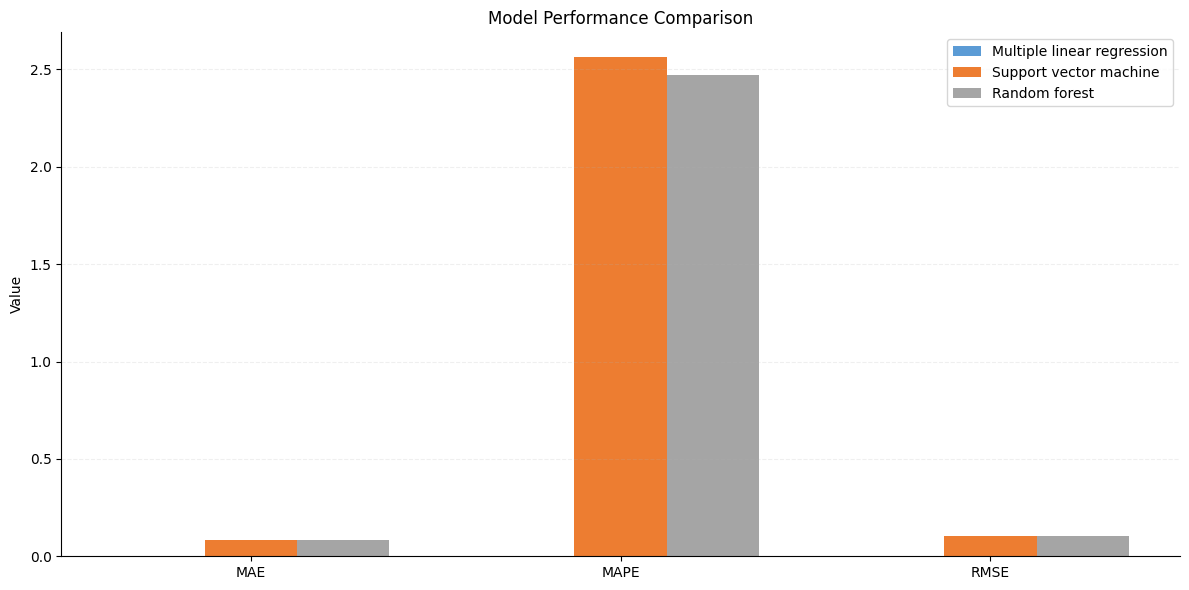


Detailed Results:
      Multiple linear regression  Support vector machine  Random forest
MAE                          0.0                  0.0853         0.0847
MAPE                         0.0                  2.5622         2.4718
RMSE                         0.0                  0.1045         0.1022


In [ ]:
# Using the results from previous models
# Prepare data for plotting
X = merged_df[['co2gdp', 'co2capi', 'buildings', 'power', 'transport']]
y = merged_df['co2em']

# Split the data and scale features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train models
mlr = LinearRegression()
svm = SVR(kernel='rbf', C=1.0)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

models = {
    'Multiple linear regression': mlr,
    'Support vector machine': svm,
    'Random forest': rf
}

# Calculate metrics for each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {'MAE': mae, 'MAPE': mape, 'RMSE': rmse}

# Convert results to DataFrame
df_results = pd.DataFrame(results).round(4)

# Plotting
metrics = ['MAE', 'MAPE', 'RMSE']
x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(12, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot bars for each model
plt.bar(x - width, df_results.iloc[:, 0], width, label='Multiple linear regression', color='#5B9BD5')
plt.bar(x, df_results.iloc[:, 1], width, label='Support vector machine', color='#ED7D31')
plt.bar(x + width, df_results.iloc[:, 2], width, label='Random forest', color='#A5A5A5')

# Customize plot
plt.ylabel('Value')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()

# Print the actual values
print("\nDetailed Results:")
print(df_results)

Data Info:
           co2gdp    co2capi  buildings      power  transport
count   34.000000  34.000000   34.00000  34.000000  34.000000
unique  34.000000  34.000000   34.00000  34.000000  34.000000
top      0.200214   1.685401    8.05496  28.003482  28.001048
freq     1.000000   1.000000    1.00000   1.000000   1.000000

Target Info:
count     34.000000
unique    34.000000
top        1.685401
freq       1.000000
Name: co2em, dtype: float64

Model Coefficients:
co2gdp: -0.0000
co2capi: 0.7227
buildings: -0.0000
power: 0.0000
transport: -0.0000

Model Intercept: 3.2321149984074085

Detailed Metrics:
MAE: 0.0000
MAPE: 0.0000%
RMSE: 0.0000


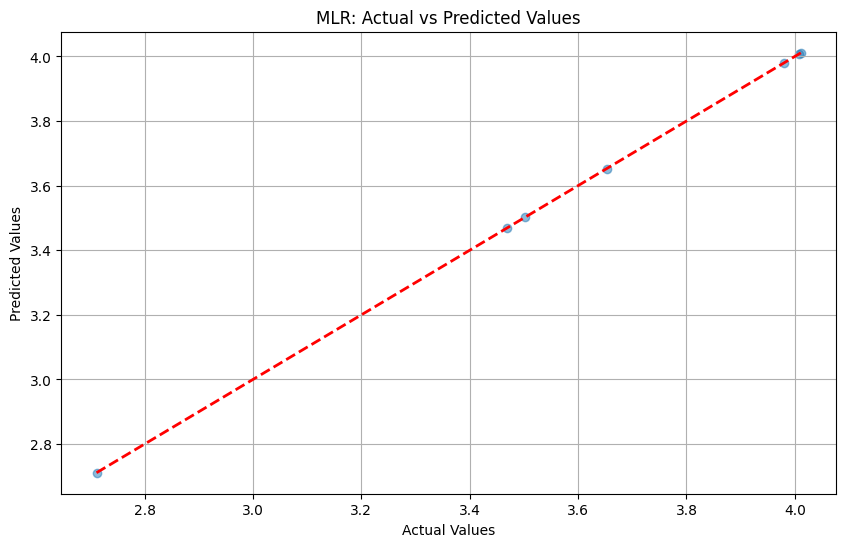

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt

# 1. ตรวจสอบข้อมูล
print("Data Info:")
print(X.describe())
print("\nTarget Info:")
print(y.describe())

# 2. ทดสอบ MLR แบบละเอียด
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# สร้างและฝึกโมเดล MLR
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)

# ทำนายและตรวจสอบผล
y_pred = mlr.predict(X_test_scaled)

print("\nModel Coefficients:")
for feature, coef in zip(X.columns, mlr.coef_):
    print(f"{feature}: {coef:.4f}")

print("\nModel Intercept:", mlr.intercept_)

# คำนวณ metrics
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nDetailed Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"RMSE: {rmse:.4f}")

# แสดงการกระจายของค่าจริงและค่าทำนาย
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('MLR: Actual vs Predicted Values')
plt.grid(True)
plt.show()